# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [17]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

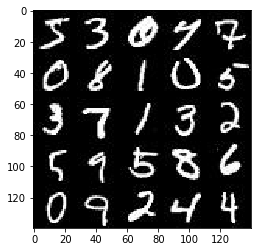

In [18]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

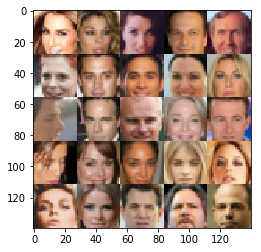

In [19]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Users\green\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [21]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    in_learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    return input_real, input_z, in_learning_rate

  


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [27]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope("discriminator", reuse = reuse):
        # Build input layer (input_layer 28x28)
        x1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding = "same")
        x1 = tf.maximum(alpha * x1, x1)
        #14x14x64
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides = 2, padding = "same")
        x2 = tf.layers.batch_normalization(x2, training = True)
        x2 = tf.maximum(alpha * x2, x2)
        #7x7x128
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides = 2, padding = "same")
        x3 = tf.layers.batch_normalization(x3, training = True)
        x3 = tf.maximum(alpha * x3, x3)
        #4x4x256
        
        # Flatten it
        flat = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)       

    return output, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [28]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope("generator", reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #2x2x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding = "valid")
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #7x7x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides = 2, padding = "same")
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #14x14x128
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides = 2, padding = "same")
        #28x28x3
        
        output = tf.tanh(logits)        
    
    return output



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [29]:
def model_loss(input_real, input_z, out_channel_dim, alpha = 0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train = True, alpha = alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha = alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True, alpha = alpha)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [30]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith("discriminator")]
    g_vars = [var for var in t_vars if var.name.startswith("generator")]
    
    # Optimize
    d_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    deps = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_dep = [dep for dep in deps if dep.name.startswith("generator")]
    with tf.control_dependencies(g_dep):
        g_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [32]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, in_learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    dis_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    dis_ops, gen_ops = model_opt(dis_loss, gen_loss, learning_rate, beta1)
    
    steps = 0
    
    print_every = 10
    show_every = 100
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                batch_images *= 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(dis_ops, feed_dict={ input_real: batch_images, input_z: batch_z, in_learning_rate: learning_rate })
                _ = sess.run(gen_ops, feed_dict={ input_z: batch_z, in_learning_rate: learning_rate })
                
                if steps % print_every == 0:
                    dis_loss_train = dis_loss.eval({
                        input_z: batch_z,
                        input_real: batch_images
                    })
                    gen_loss_train = gen_loss.eval({
                        input_z: batch_z
                    })
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}...".format(dis_loss_train),
                         "Generator Loss: {:.4f}".format(gen_loss_train))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)  
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7065... Generator Loss: 0.9504
Epoch 1/2... Discriminator Loss: 0.5487... Generator Loss: 0.9907
Epoch 1/2... Discriminator Loss: 0.1771... Generator Loss: 2.5100
Epoch 1/2... Discriminator Loss: 0.3018... Generator Loss: 9.1250
Epoch 1/2... Discriminator Loss: 0.0981... Generator Loss: 5.0973
Epoch 1/2... Discriminator Loss: 0.1200... Generator Loss: 6.2174
Epoch 1/2... Discriminator Loss: 0.1198... Generator Loss: 4.4943
Epoch 1/2... Discriminator Loss: 0.1674... Generator Loss: 3.4359
Epoch 1/2... Discriminator Loss: 0.5540... Generator Loss: 8.6420
Epoch 1/2... Discriminator Loss: 0.2999... Generator Loss: 4.2732


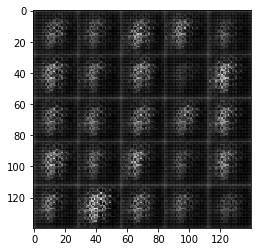

Epoch 1/2... Discriminator Loss: 0.2091... Generator Loss: 2.4076
Epoch 1/2... Discriminator Loss: 0.6725... Generator Loss: 1.2081
Epoch 1/2... Discriminator Loss: 0.3725... Generator Loss: 2.4487
Epoch 1/2... Discriminator Loss: 0.1933... Generator Loss: 2.7340
Epoch 1/2... Discriminator Loss: 0.1607... Generator Loss: 2.7487
Epoch 1/2... Discriminator Loss: 0.0784... Generator Loss: 3.8042
Epoch 1/2... Discriminator Loss: 0.1298... Generator Loss: 2.8300
Epoch 1/2... Discriminator Loss: 0.1353... Generator Loss: 2.4366
Epoch 1/2... Discriminator Loss: 0.1327... Generator Loss: 3.5837
Epoch 1/2... Discriminator Loss: 0.1898... Generator Loss: 4.2254


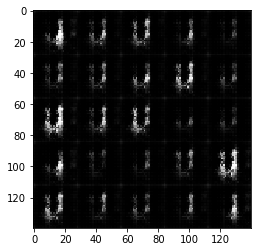

Epoch 1/2... Discriminator Loss: 0.2304... Generator Loss: 2.1368
Epoch 1/2... Discriminator Loss: 0.1080... Generator Loss: 3.5708
Epoch 1/2... Discriminator Loss: 0.2051... Generator Loss: 2.5484
Epoch 1/2... Discriminator Loss: 0.3665... Generator Loss: 1.5464
Epoch 1/2... Discriminator Loss: 0.2605... Generator Loss: 3.4872
Epoch 1/2... Discriminator Loss: 0.1744... Generator Loss: 2.8280
Epoch 1/2... Discriminator Loss: 0.5791... Generator Loss: 6.6048
Epoch 1/2... Discriminator Loss: 0.5078... Generator Loss: 1.4721
Epoch 1/2... Discriminator Loss: 0.1219... Generator Loss: 3.1524
Epoch 1/2... Discriminator Loss: 0.2039... Generator Loss: 4.3441


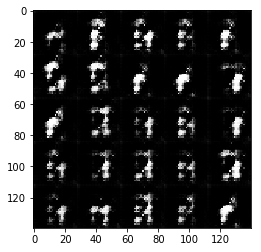

Epoch 1/2... Discriminator Loss: 0.3126... Generator Loss: 2.4136
Epoch 1/2... Discriminator Loss: 0.3435... Generator Loss: 2.8178
Epoch 1/2... Discriminator Loss: 0.2561... Generator Loss: 2.9725
Epoch 1/2... Discriminator Loss: 0.3441... Generator Loss: 2.9422
Epoch 1/2... Discriminator Loss: 0.2294... Generator Loss: 3.9375
Epoch 1/2... Discriminator Loss: 0.1337... Generator Loss: 2.9032
Epoch 1/2... Discriminator Loss: 0.2370... Generator Loss: 2.8828
Epoch 1/2... Discriminator Loss: 0.1430... Generator Loss: 3.1561
Epoch 1/2... Discriminator Loss: 0.2015... Generator Loss: 2.9346
Epoch 1/2... Discriminator Loss: 0.1704... Generator Loss: 2.5635


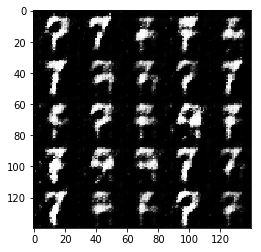

Epoch 1/2... Discriminator Loss: 0.5126... Generator Loss: 5.2782
Epoch 1/2... Discriminator Loss: 0.4838... Generator Loss: 5.4476
Epoch 1/2... Discriminator Loss: 0.2552... Generator Loss: 3.6648
Epoch 1/2... Discriminator Loss: 1.3187... Generator Loss: 0.6434
Epoch 1/2... Discriminator Loss: 0.4106... Generator Loss: 1.8799
Epoch 1/2... Discriminator Loss: 0.4650... Generator Loss: 2.4060
Epoch 1/2... Discriminator Loss: 0.3203... Generator Loss: 2.2216
Epoch 1/2... Discriminator Loss: 0.2710... Generator Loss: 2.8682
Epoch 1/2... Discriminator Loss: 0.2703... Generator Loss: 3.4940
Epoch 1/2... Discriminator Loss: 0.3847... Generator Loss: 2.2581


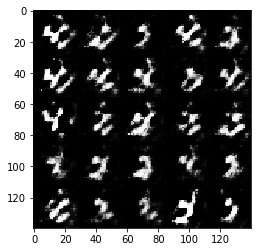

Epoch 1/2... Discriminator Loss: 0.3069... Generator Loss: 2.3291
Epoch 1/2... Discriminator Loss: 0.3030... Generator Loss: 2.0053
Epoch 1/2... Discriminator Loss: 0.1987... Generator Loss: 2.6993
Epoch 1/2... Discriminator Loss: 0.3778... Generator Loss: 1.5422
Epoch 1/2... Discriminator Loss: 0.2219... Generator Loss: 2.9345
Epoch 1/2... Discriminator Loss: 0.3908... Generator Loss: 3.1802
Epoch 1/2... Discriminator Loss: 0.5271... Generator Loss: 2.2481
Epoch 1/2... Discriminator Loss: 0.4497... Generator Loss: 1.6456
Epoch 1/2... Discriminator Loss: 0.3478... Generator Loss: 2.5196
Epoch 1/2... Discriminator Loss: 0.4217... Generator Loss: 2.8666


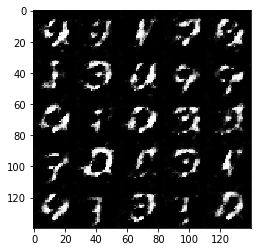

Epoch 1/2... Discriminator Loss: 0.3097... Generator Loss: 2.9252
Epoch 1/2... Discriminator Loss: 0.4211... Generator Loss: 3.3216
Epoch 1/2... Discriminator Loss: 0.8352... Generator Loss: 0.8353
Epoch 1/2... Discriminator Loss: 0.2444... Generator Loss: 3.1050
Epoch 1/2... Discriminator Loss: 0.4942... Generator Loss: 1.8988
Epoch 1/2... Discriminator Loss: 0.4321... Generator Loss: 2.6893
Epoch 1/2... Discriminator Loss: 0.3531... Generator Loss: 1.8355
Epoch 1/2... Discriminator Loss: 0.6045... Generator Loss: 3.3657
Epoch 1/2... Discriminator Loss: 0.4313... Generator Loss: 2.3921
Epoch 1/2... Discriminator Loss: 0.4951... Generator Loss: 2.4290


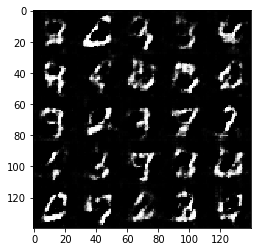

Epoch 1/2... Discriminator Loss: 1.3238... Generator Loss: 4.9303
Epoch 1/2... Discriminator Loss: 0.5488... Generator Loss: 1.6547
Epoch 1/2... Discriminator Loss: 0.3326... Generator Loss: 2.7225
Epoch 1/2... Discriminator Loss: 1.1536... Generator Loss: 3.5500
Epoch 1/2... Discriminator Loss: 0.5787... Generator Loss: 1.9956
Epoch 1/2... Discriminator Loss: 0.5417... Generator Loss: 1.8499
Epoch 1/2... Discriminator Loss: 0.6932... Generator Loss: 2.9492
Epoch 1/2... Discriminator Loss: 0.7055... Generator Loss: 1.6937
Epoch 1/2... Discriminator Loss: 0.6680... Generator Loss: 1.6734
Epoch 1/2... Discriminator Loss: 0.9634... Generator Loss: 0.7638


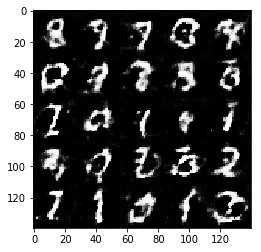

Epoch 1/2... Discriminator Loss: 0.5441... Generator Loss: 1.5797
Epoch 1/2... Discriminator Loss: 0.7034... Generator Loss: 1.4132
Epoch 1/2... Discriminator Loss: 0.5599... Generator Loss: 1.4478
Epoch 1/2... Discriminator Loss: 0.6088... Generator Loss: 1.2469
Epoch 1/2... Discriminator Loss: 0.6030... Generator Loss: 1.2678
Epoch 1/2... Discriminator Loss: 0.9900... Generator Loss: 1.3459
Epoch 1/2... Discriminator Loss: 1.0526... Generator Loss: 2.7709
Epoch 1/2... Discriminator Loss: 0.6726... Generator Loss: 1.9400
Epoch 1/2... Discriminator Loss: 0.6631... Generator Loss: 1.8367
Epoch 1/2... Discriminator Loss: 0.8831... Generator Loss: 0.8924


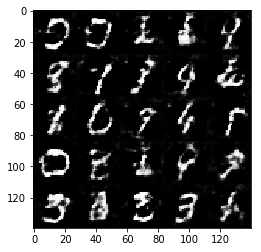

Epoch 1/2... Discriminator Loss: 0.7958... Generator Loss: 1.4795
Epoch 1/2... Discriminator Loss: 0.6740... Generator Loss: 1.2634
Epoch 1/2... Discriminator Loss: 0.5903... Generator Loss: 1.4999
Epoch 2/2... Discriminator Loss: 0.6260... Generator Loss: 1.1029
Epoch 2/2... Discriminator Loss: 0.5462... Generator Loss: 1.4756
Epoch 2/2... Discriminator Loss: 0.5555... Generator Loss: 1.4520
Epoch 2/2... Discriminator Loss: 0.8536... Generator Loss: 0.8518
Epoch 2/2... Discriminator Loss: 0.6660... Generator Loss: 1.1797
Epoch 2/2... Discriminator Loss: 0.7171... Generator Loss: 1.4979
Epoch 2/2... Discriminator Loss: 0.5049... Generator Loss: 1.9699


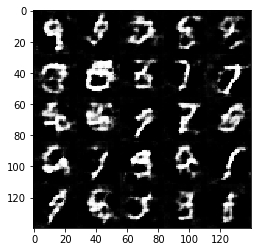

Epoch 2/2... Discriminator Loss: 0.6057... Generator Loss: 1.9916
Epoch 2/2... Discriminator Loss: 0.4350... Generator Loss: 2.2470
Epoch 2/2... Discriminator Loss: 0.5543... Generator Loss: 2.1431
Epoch 2/2... Discriminator Loss: 0.8432... Generator Loss: 2.0943
Epoch 2/2... Discriminator Loss: 0.6204... Generator Loss: 2.2837
Epoch 2/2... Discriminator Loss: 0.6703... Generator Loss: 1.1028
Epoch 2/2... Discriminator Loss: 0.5933... Generator Loss: 1.2729
Epoch 2/2... Discriminator Loss: 1.4460... Generator Loss: 0.4156
Epoch 2/2... Discriminator Loss: 0.6267... Generator Loss: 2.3240
Epoch 2/2... Discriminator Loss: 0.6337... Generator Loss: 1.2237


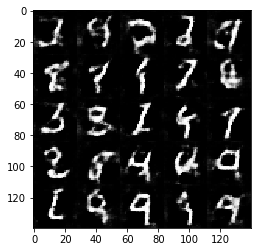

Epoch 2/2... Discriminator Loss: 0.5948... Generator Loss: 1.4516
Epoch 2/2... Discriminator Loss: 0.5819... Generator Loss: 2.0772
Epoch 2/2... Discriminator Loss: 0.7702... Generator Loss: 2.1012
Epoch 2/2... Discriminator Loss: 0.7032... Generator Loss: 1.5381
Epoch 2/2... Discriminator Loss: 0.8495... Generator Loss: 0.8607
Epoch 2/2... Discriminator Loss: 0.6511... Generator Loss: 1.3960
Epoch 2/2... Discriminator Loss: 0.5639... Generator Loss: 2.0006
Epoch 2/2... Discriminator Loss: 1.0750... Generator Loss: 0.6303
Epoch 2/2... Discriminator Loss: 0.5761... Generator Loss: 1.5408
Epoch 2/2... Discriminator Loss: 0.6033... Generator Loss: 1.8603


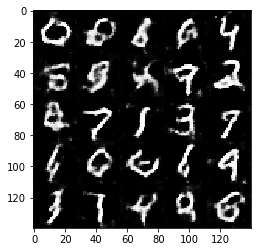

Epoch 2/2... Discriminator Loss: 0.6595... Generator Loss: 1.2198
Epoch 2/2... Discriminator Loss: 0.8160... Generator Loss: 2.4642
Epoch 2/2... Discriminator Loss: 1.1096... Generator Loss: 0.6174
Epoch 2/2... Discriminator Loss: 1.2156... Generator Loss: 0.5948
Epoch 2/2... Discriminator Loss: 0.6970... Generator Loss: 1.7380
Epoch 2/2... Discriminator Loss: 0.6656... Generator Loss: 2.0501
Epoch 2/2... Discriminator Loss: 0.6094... Generator Loss: 1.2173
Epoch 2/2... Discriminator Loss: 0.8325... Generator Loss: 0.8594
Epoch 2/2... Discriminator Loss: 0.7657... Generator Loss: 1.3462
Epoch 2/2... Discriminator Loss: 0.7884... Generator Loss: 1.8161


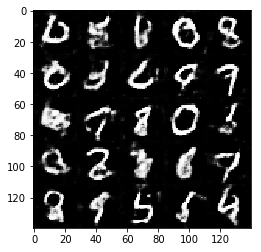

Epoch 2/2... Discriminator Loss: 0.6352... Generator Loss: 1.6185
Epoch 2/2... Discriminator Loss: 1.1404... Generator Loss: 2.5218
Epoch 2/2... Discriminator Loss: 0.7310... Generator Loss: 1.8859
Epoch 2/2... Discriminator Loss: 0.7181... Generator Loss: 1.3134
Epoch 2/2... Discriminator Loss: 1.0803... Generator Loss: 2.5752
Epoch 2/2... Discriminator Loss: 0.6275... Generator Loss: 1.3878
Epoch 2/2... Discriminator Loss: 0.7354... Generator Loss: 2.1915
Epoch 2/2... Discriminator Loss: 0.4916... Generator Loss: 1.5305
Epoch 2/2... Discriminator Loss: 0.5084... Generator Loss: 1.5570
Epoch 2/2... Discriminator Loss: 1.0907... Generator Loss: 0.5638


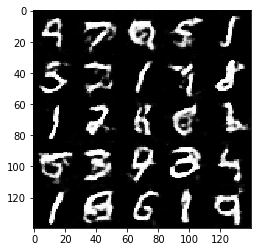

Epoch 2/2... Discriminator Loss: 0.6742... Generator Loss: 1.1039
Epoch 2/2... Discriminator Loss: 0.5990... Generator Loss: 2.0220
Epoch 2/2... Discriminator Loss: 1.2464... Generator Loss: 0.4952
Epoch 2/2... Discriminator Loss: 0.5573... Generator Loss: 1.3295
Epoch 2/2... Discriminator Loss: 0.7926... Generator Loss: 0.8425
Epoch 2/2... Discriminator Loss: 0.6738... Generator Loss: 1.0521
Epoch 2/2... Discriminator Loss: 0.7537... Generator Loss: 0.9386
Epoch 2/2... Discriminator Loss: 0.6939... Generator Loss: 1.1977
Epoch 2/2... Discriminator Loss: 0.5397... Generator Loss: 1.4186
Epoch 2/2... Discriminator Loss: 0.6481... Generator Loss: 1.1861


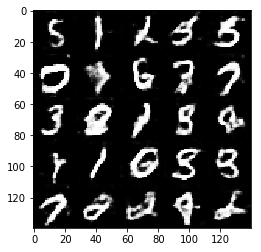

Epoch 2/2... Discriminator Loss: 0.7139... Generator Loss: 1.2079
Epoch 2/2... Discriminator Loss: 0.5558... Generator Loss: 1.3830
Epoch 2/2... Discriminator Loss: 0.4789... Generator Loss: 1.4647
Epoch 2/2... Discriminator Loss: 0.5431... Generator Loss: 1.8749
Epoch 2/2... Discriminator Loss: 0.6355... Generator Loss: 1.2057
Epoch 2/2... Discriminator Loss: 0.5463... Generator Loss: 1.5845
Epoch 2/2... Discriminator Loss: 0.8004... Generator Loss: 1.8878
Epoch 2/2... Discriminator Loss: 0.6908... Generator Loss: 0.9713
Epoch 2/2... Discriminator Loss: 0.8155... Generator Loss: 0.9702
Epoch 2/2... Discriminator Loss: 1.3382... Generator Loss: 3.5140


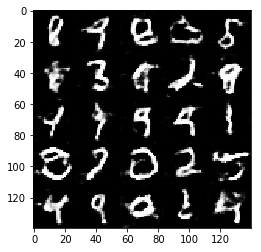

Epoch 2/2... Discriminator Loss: 0.7522... Generator Loss: 1.0138
Epoch 2/2... Discriminator Loss: 0.4860... Generator Loss: 1.4653
Epoch 2/2... Discriminator Loss: 0.6064... Generator Loss: 1.4648
Epoch 2/2... Discriminator Loss: 0.5185... Generator Loss: 1.9510
Epoch 2/2... Discriminator Loss: 0.4836... Generator Loss: 1.3549
Epoch 2/2... Discriminator Loss: 0.5267... Generator Loss: 1.4844
Epoch 2/2... Discriminator Loss: 0.4726... Generator Loss: 2.1428
Epoch 2/2... Discriminator Loss: 1.7133... Generator Loss: 0.3393
Epoch 2/2... Discriminator Loss: 0.5555... Generator Loss: 1.5336
Epoch 2/2... Discriminator Loss: 0.5447... Generator Loss: 1.5315


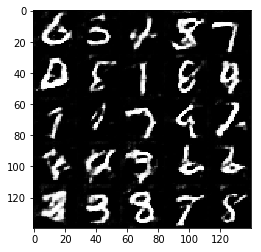

Epoch 2/2... Discriminator Loss: 0.5943... Generator Loss: 1.1709
Epoch 2/2... Discriminator Loss: 0.5885... Generator Loss: 1.1974
Epoch 2/2... Discriminator Loss: 0.6473... Generator Loss: 1.1179
Epoch 2/2... Discriminator Loss: 0.6369... Generator Loss: 1.2392
Epoch 2/2... Discriminator Loss: 0.8323... Generator Loss: 2.8184
Epoch 2/2... Discriminator Loss: 0.4410... Generator Loss: 1.4433
Epoch 2/2... Discriminator Loss: 0.5607... Generator Loss: 1.4275
Epoch 2/2... Discriminator Loss: 0.4539... Generator Loss: 2.5793
Epoch 2/2... Discriminator Loss: 0.2661... Generator Loss: 2.0707
Epoch 2/2... Discriminator Loss: 2.3109... Generator Loss: 0.1641


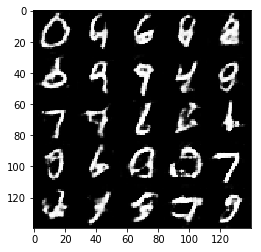

Epoch 2/2... Discriminator Loss: 1.1763... Generator Loss: 1.4484
Epoch 2/2... Discriminator Loss: 0.8931... Generator Loss: 0.8110
Epoch 2/2... Discriminator Loss: 0.5747... Generator Loss: 1.1951
Epoch 2/2... Discriminator Loss: 0.5220... Generator Loss: 1.3855
Epoch 2/2... Discriminator Loss: 0.4893... Generator Loss: 1.6963
Epoch 2/2... Discriminator Loss: 0.6331... Generator Loss: 1.0183
Epoch 2/2... Discriminator Loss: 0.4595... Generator Loss: 1.5005


In [33]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

tf.reset_default_graph()
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.0532... Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 0.2508... Generator Loss: 4.8620
Epoch 1/1... Discriminator Loss: 0.2165... Generator Loss: 3.0802
Epoch 1/1... Discriminator Loss: 0.1321... Generator Loss: 2.6768
Epoch 1/1... Discriminator Loss: 0.1896... Generator Loss: 2.5839
Epoch 1/1... Discriminator Loss: 0.1709... Generator Loss: 2.1962
Epoch 1/1... Discriminator Loss: 0.0549... Generator Loss: 4.1042
Epoch 1/1... Discriminator Loss: 0.0498... Generator Loss: 4.6193
Epoch 1/1... Discriminator Loss: 0.0778... Generator Loss: 4.1790
Epoch 1/1... Discriminator Loss: 0.2645... Generator Loss: 6.3596


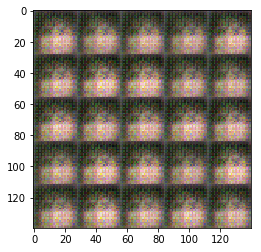

Epoch 1/1... Discriminator Loss: 0.7684... Generator Loss: 8.8527
Epoch 1/1... Discriminator Loss: 0.2431... Generator Loss: 3.7758
Epoch 1/1... Discriminator Loss: 0.3941... Generator Loss: 1.4067
Epoch 1/1... Discriminator Loss: 0.4451... Generator Loss: 2.0337
Epoch 1/1... Discriminator Loss: 0.2556... Generator Loss: 2.0898
Epoch 1/1... Discriminator Loss: 0.5226... Generator Loss: 1.4347
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 6.8920
Epoch 1/1... Discriminator Loss: 1.0489... Generator Loss: 6.9891
Epoch 1/1... Discriminator Loss: 0.2246... Generator Loss: 2.8253
Epoch 1/1... Discriminator Loss: 0.3593... Generator Loss: 3.3234


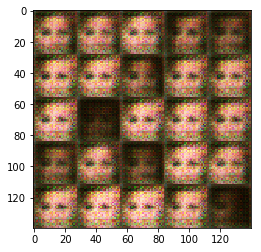

Epoch 1/1... Discriminator Loss: 0.5087... Generator Loss: 1.1723
Epoch 1/1... Discriminator Loss: 0.4563... Generator Loss: 4.0460
Epoch 1/1... Discriminator Loss: 0.8443... Generator Loss: 0.6446
Epoch 1/1... Discriminator Loss: 0.3308... Generator Loss: 1.5553
Epoch 1/1... Discriminator Loss: 0.8542... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 0.2622... Generator Loss: 2.2296
Epoch 1/1... Discriminator Loss: 2.5459... Generator Loss: 0.1174
Epoch 1/1... Discriminator Loss: 0.7516... Generator Loss: 1.1120
Epoch 1/1... Discriminator Loss: 0.6392... Generator Loss: 1.3449
Epoch 1/1... Discriminator Loss: 0.6778... Generator Loss: 1.3807


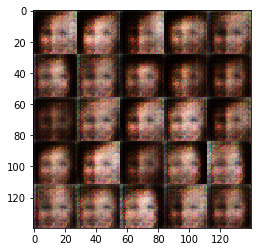

Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 1.9619
Epoch 1/1... Discriminator Loss: 1.0075... Generator Loss: 3.0213
Epoch 1/1... Discriminator Loss: 1.1068... Generator Loss: 2.2055
Epoch 1/1... Discriminator Loss: 0.8466... Generator Loss: 1.6588
Epoch 1/1... Discriminator Loss: 0.7483... Generator Loss: 2.3164
Epoch 1/1... Discriminator Loss: 0.5919... Generator Loss: 1.6650
Epoch 1/1... Discriminator Loss: 0.8937... Generator Loss: 1.7141
Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 0.6241
Epoch 1/1... Discriminator Loss: 0.7346... Generator Loss: 1.3887
Epoch 1/1... Discriminator Loss: 0.7289... Generator Loss: 1.1641


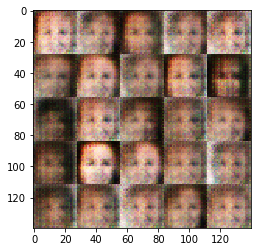

Epoch 1/1... Discriminator Loss: 0.8805... Generator Loss: 0.9583
Epoch 1/1... Discriminator Loss: 1.2478... Generator Loss: 0.9624
Epoch 1/1... Discriminator Loss: 0.7024... Generator Loss: 1.5961
Epoch 1/1... Discriminator Loss: 0.8106... Generator Loss: 1.3697
Epoch 1/1... Discriminator Loss: 0.9718... Generator Loss: 1.2680
Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 1.2868
Epoch 1/1... Discriminator Loss: 0.9093... Generator Loss: 2.0900
Epoch 1/1... Discriminator Loss: 0.7800... Generator Loss: 1.6608
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.9269
Epoch 1/1... Discriminator Loss: 0.6228... Generator Loss: 1.5792


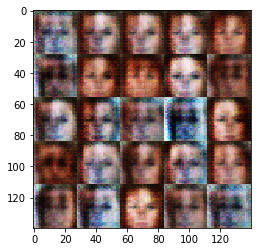

Epoch 1/1... Discriminator Loss: 0.6383... Generator Loss: 1.4955
Epoch 1/1... Discriminator Loss: 0.9449... Generator Loss: 1.3976
Epoch 1/1... Discriminator Loss: 1.0616... Generator Loss: 0.7560
Epoch 1/1... Discriminator Loss: 1.2442... Generator Loss: 0.5762
Epoch 1/1... Discriminator Loss: 1.1828... Generator Loss: 0.5968
Epoch 1/1... Discriminator Loss: 0.7338... Generator Loss: 1.8967
Epoch 1/1... Discriminator Loss: 0.7553... Generator Loss: 1.0485
Epoch 1/1... Discriminator Loss: 0.8775... Generator Loss: 2.1228
Epoch 1/1... Discriminator Loss: 0.6830... Generator Loss: 1.3792
Epoch 1/1... Discriminator Loss: 0.5324... Generator Loss: 1.9954


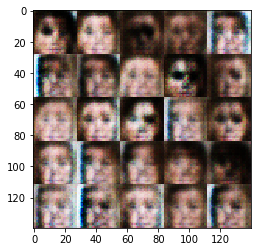

Epoch 1/1... Discriminator Loss: 0.7470... Generator Loss: 2.0321
Epoch 1/1... Discriminator Loss: 0.6423... Generator Loss: 1.4773
Epoch 1/1... Discriminator Loss: 1.3176... Generator Loss: 3.0296
Epoch 1/1... Discriminator Loss: 0.5070... Generator Loss: 1.8733
Epoch 1/1... Discriminator Loss: 1.0471... Generator Loss: 1.0936
Epoch 1/1... Discriminator Loss: 0.8903... Generator Loss: 1.4172
Epoch 1/1... Discriminator Loss: 0.9962... Generator Loss: 0.8613
Epoch 1/1... Discriminator Loss: 0.8753... Generator Loss: 1.0141
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 0.9564
Epoch 1/1... Discriminator Loss: 0.9203... Generator Loss: 1.0652


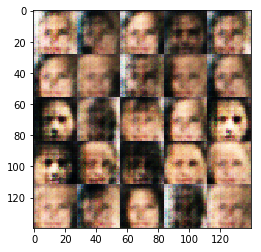

Epoch 1/1... Discriminator Loss: 0.8436... Generator Loss: 1.0991
Epoch 1/1... Discriminator Loss: 0.7925... Generator Loss: 2.7104
Epoch 1/1... Discriminator Loss: 0.8897... Generator Loss: 1.0801
Epoch 1/1... Discriminator Loss: 0.8663... Generator Loss: 0.9561
Epoch 1/1... Discriminator Loss: 0.8935... Generator Loss: 1.2956
Epoch 1/1... Discriminator Loss: 0.6463... Generator Loss: 1.5708
Epoch 1/1... Discriminator Loss: 0.7666... Generator Loss: 1.4751
Epoch 1/1... Discriminator Loss: 0.9171... Generator Loss: 2.1247
Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 0.9851
Epoch 1/1... Discriminator Loss: 1.2913... Generator Loss: 3.1386


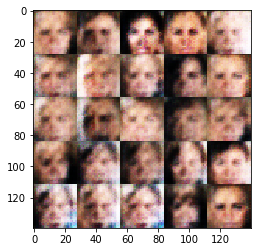

Epoch 1/1... Discriminator Loss: 0.9250... Generator Loss: 1.1121
Epoch 1/1... Discriminator Loss: 1.0161... Generator Loss: 1.0412
Epoch 1/1... Discriminator Loss: 0.9583... Generator Loss: 0.8974
Epoch 1/1... Discriminator Loss: 0.7265... Generator Loss: 2.0356
Epoch 1/1... Discriminator Loss: 0.8235... Generator Loss: 1.3463
Epoch 1/1... Discriminator Loss: 1.2834... Generator Loss: 1.4881
Epoch 1/1... Discriminator Loss: 0.9009... Generator Loss: 1.4352
Epoch 1/1... Discriminator Loss: 1.0809... Generator Loss: 1.5841
Epoch 1/1... Discriminator Loss: 0.9353... Generator Loss: 1.8505
Epoch 1/1... Discriminator Loss: 0.8696... Generator Loss: 1.0710


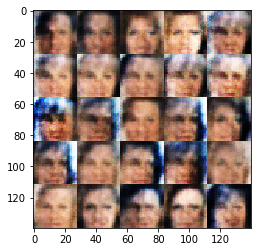

Epoch 1/1... Discriminator Loss: 0.8951... Generator Loss: 0.9795
Epoch 1/1... Discriminator Loss: 1.1039... Generator Loss: 0.6117
Epoch 1/1... Discriminator Loss: 0.9097... Generator Loss: 1.6459
Epoch 1/1... Discriminator Loss: 0.9427... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 0.6701... Generator Loss: 1.2337
Epoch 1/1... Discriminator Loss: 0.9196... Generator Loss: 1.1065
Epoch 1/1... Discriminator Loss: 0.7874... Generator Loss: 1.2193
Epoch 1/1... Discriminator Loss: 1.0485... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.0357... Generator Loss: 1.1069
Epoch 1/1... Discriminator Loss: 0.9110... Generator Loss: 1.7741


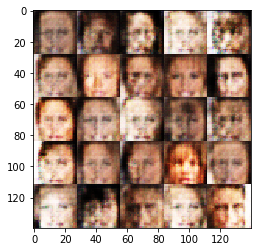

Epoch 1/1... Discriminator Loss: 1.1219... Generator Loss: 0.8598
Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 0.9876
Epoch 1/1... Discriminator Loss: 1.1137... Generator Loss: 1.6441
Epoch 1/1... Discriminator Loss: 0.7935... Generator Loss: 1.2840
Epoch 1/1... Discriminator Loss: 1.0129... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 0.8049... Generator Loss: 1.5119
Epoch 1/1... Discriminator Loss: 1.1173... Generator Loss: 0.6699
Epoch 1/1... Discriminator Loss: 0.7999... Generator Loss: 1.3910
Epoch 1/1... Discriminator Loss: 1.0852... Generator Loss: 0.6339
Epoch 1/1... Discriminator Loss: 1.0481... Generator Loss: 0.8809


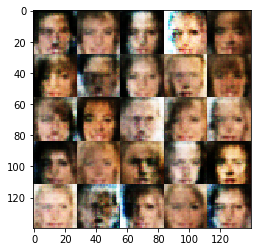

Epoch 1/1... Discriminator Loss: 0.7856... Generator Loss: 1.2186
Epoch 1/1... Discriminator Loss: 1.1418... Generator Loss: 0.6275
Epoch 1/1... Discriminator Loss: 0.8095... Generator Loss: 1.0959
Epoch 1/1... Discriminator Loss: 1.0648... Generator Loss: 1.0505
Epoch 1/1... Discriminator Loss: 0.8103... Generator Loss: 1.1074
Epoch 1/1... Discriminator Loss: 0.9941... Generator Loss: 0.8654
Epoch 1/1... Discriminator Loss: 1.0788... Generator Loss: 0.7035
Epoch 1/1... Discriminator Loss: 0.9732... Generator Loss: 1.0480
Epoch 1/1... Discriminator Loss: 1.0476... Generator Loss: 0.7621
Epoch 1/1... Discriminator Loss: 0.8877... Generator Loss: 1.3071


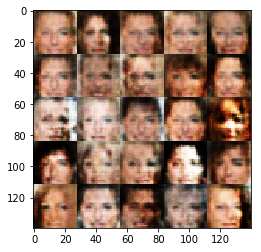

Epoch 1/1... Discriminator Loss: 1.0008... Generator Loss: 0.7297
Epoch 1/1... Discriminator Loss: 0.9038... Generator Loss: 0.9957
Epoch 1/1... Discriminator Loss: 0.9587... Generator Loss: 1.0288
Epoch 1/1... Discriminator Loss: 1.1033... Generator Loss: 0.6796
Epoch 1/1... Discriminator Loss: 0.9933... Generator Loss: 0.9728
Epoch 1/1... Discriminator Loss: 0.8642... Generator Loss: 1.3108
Epoch 1/1... Discriminator Loss: 0.9386... Generator Loss: 1.4137
Epoch 1/1... Discriminator Loss: 0.7263... Generator Loss: 1.2079
Epoch 1/1... Discriminator Loss: 0.9861... Generator Loss: 0.9318
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 1.4650


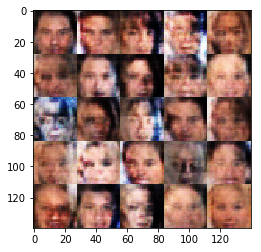

Epoch 1/1... Discriminator Loss: 1.0500... Generator Loss: 1.3076
Epoch 1/1... Discriminator Loss: 0.7711... Generator Loss: 1.3480
Epoch 1/1... Discriminator Loss: 0.8314... Generator Loss: 1.1965
Epoch 1/1... Discriminator Loss: 0.7816... Generator Loss: 0.9445
Epoch 1/1... Discriminator Loss: 0.7992... Generator Loss: 1.0540
Epoch 1/1... Discriminator Loss: 0.8448... Generator Loss: 1.4416
Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 0.6309
Epoch 1/1... Discriminator Loss: 0.8635... Generator Loss: 1.1923
Epoch 1/1... Discriminator Loss: 1.2613... Generator Loss: 2.4744
Epoch 1/1... Discriminator Loss: 0.8024... Generator Loss: 1.2016


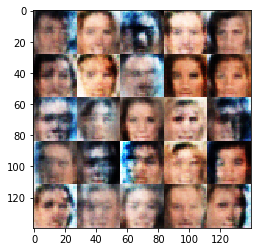

Epoch 1/1... Discriminator Loss: 0.8940... Generator Loss: 1.0356
Epoch 1/1... Discriminator Loss: 1.0404... Generator Loss: 0.8365
Epoch 1/1... Discriminator Loss: 0.8886... Generator Loss: 1.4879
Epoch 1/1... Discriminator Loss: 0.8506... Generator Loss: 1.1133
Epoch 1/1... Discriminator Loss: 0.8132... Generator Loss: 1.2199
Epoch 1/1... Discriminator Loss: 0.7107... Generator Loss: 1.3820
Epoch 1/1... Discriminator Loss: 1.0201... Generator Loss: 1.1271
Epoch 1/1... Discriminator Loss: 0.8217... Generator Loss: 1.0096
Epoch 1/1... Discriminator Loss: 0.8218... Generator Loss: 1.0557
Epoch 1/1... Discriminator Loss: 0.8857... Generator Loss: 0.9421


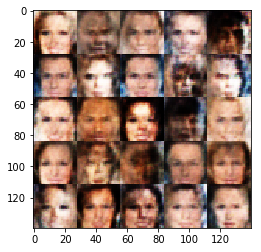

Epoch 1/1... Discriminator Loss: 0.8040... Generator Loss: 1.4231
Epoch 1/1... Discriminator Loss: 0.8112... Generator Loss: 1.1793
Epoch 1/1... Discriminator Loss: 0.8571... Generator Loss: 0.9483
Epoch 1/1... Discriminator Loss: 0.8160... Generator Loss: 1.4433
Epoch 1/1... Discriminator Loss: 0.9774... Generator Loss: 1.5530
Epoch 1/1... Discriminator Loss: 0.9666... Generator Loss: 1.2929
Epoch 1/1... Discriminator Loss: 0.7015... Generator Loss: 1.5903
Epoch 1/1... Discriminator Loss: 0.7664... Generator Loss: 1.4328
Epoch 1/1... Discriminator Loss: 0.8845... Generator Loss: 1.6628
Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 2.1449


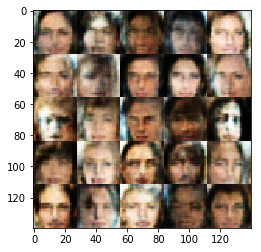

Epoch 1/1... Discriminator Loss: 1.0356... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 0.8125... Generator Loss: 1.4286
Epoch 1/1... Discriminator Loss: 1.0471... Generator Loss: 0.8375
Epoch 1/1... Discriminator Loss: 1.2397... Generator Loss: 0.5373
Epoch 1/1... Discriminator Loss: 0.8924... Generator Loss: 1.5160
Epoch 1/1... Discriminator Loss: 0.9130... Generator Loss: 1.2912
Epoch 1/1... Discriminator Loss: 0.9531... Generator Loss: 1.2405
Epoch 1/1... Discriminator Loss: 0.8670... Generator Loss: 1.0664
Epoch 1/1... Discriminator Loss: 0.8193... Generator Loss: 1.9842
Epoch 1/1... Discriminator Loss: 0.9432... Generator Loss: 1.3831


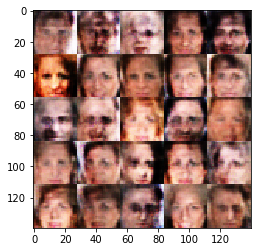

Epoch 1/1... Discriminator Loss: 0.7760... Generator Loss: 1.0480
Epoch 1/1... Discriminator Loss: 1.2247... Generator Loss: 0.7936
Epoch 1/1... Discriminator Loss: 1.0703... Generator Loss: 2.2207
Epoch 1/1... Discriminator Loss: 0.8655... Generator Loss: 1.2869
Epoch 1/1... Discriminator Loss: 0.8284... Generator Loss: 1.2112
Epoch 1/1... Discriminator Loss: 0.8876... Generator Loss: 1.4279
Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 2.0436
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 0.3842
Epoch 1/1... Discriminator Loss: 1.1957... Generator Loss: 0.9162
Epoch 1/1... Discriminator Loss: 0.9701... Generator Loss: 1.0677


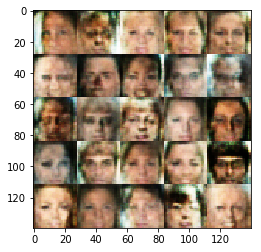

Epoch 1/1... Discriminator Loss: 0.9141... Generator Loss: 1.3510
Epoch 1/1... Discriminator Loss: 0.9862... Generator Loss: 1.2228
Epoch 1/1... Discriminator Loss: 0.7387... Generator Loss: 1.2794
Epoch 1/1... Discriminator Loss: 0.9595... Generator Loss: 0.8028
Epoch 1/1... Discriminator Loss: 0.9490... Generator Loss: 1.0644
Epoch 1/1... Discriminator Loss: 1.0143... Generator Loss: 0.8218
Epoch 1/1... Discriminator Loss: 0.9611... Generator Loss: 0.9546
Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 1.0128
Epoch 1/1... Discriminator Loss: 0.8476... Generator Loss: 1.5247
Epoch 1/1... Discriminator Loss: 1.0400... Generator Loss: 1.3209


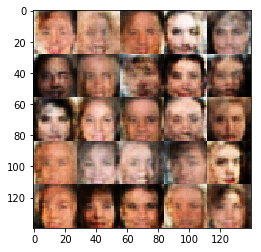

Epoch 1/1... Discriminator Loss: 0.8047... Generator Loss: 1.0438
Epoch 1/1... Discriminator Loss: 1.1425... Generator Loss: 0.8035
Epoch 1/1... Discriminator Loss: 1.0801... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 0.9603... Generator Loss: 0.8988
Epoch 1/1... Discriminator Loss: 0.9125... Generator Loss: 1.4862
Epoch 1/1... Discriminator Loss: 0.9014... Generator Loss: 1.3544
Epoch 1/1... Discriminator Loss: 0.8527... Generator Loss: 1.0685
Epoch 1/1... Discriminator Loss: 0.7929... Generator Loss: 1.2703
Epoch 1/1... Discriminator Loss: 1.0850... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 0.9718... Generator Loss: 1.3688


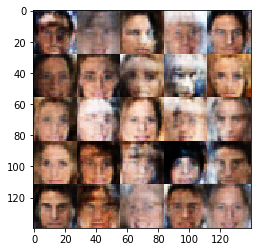

Epoch 1/1... Discriminator Loss: 1.1497... Generator Loss: 0.7561
Epoch 1/1... Discriminator Loss: 1.0388... Generator Loss: 0.9980
Epoch 1/1... Discriminator Loss: 1.0129... Generator Loss: 1.2730
Epoch 1/1... Discriminator Loss: 0.8540... Generator Loss: 0.9239
Epoch 1/1... Discriminator Loss: 0.7061... Generator Loss: 1.7858
Epoch 1/1... Discriminator Loss: 1.0978... Generator Loss: 1.4057
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 0.9170... Generator Loss: 1.7150
Epoch 1/1... Discriminator Loss: 1.2363... Generator Loss: 0.5349
Epoch 1/1... Discriminator Loss: 1.0432... Generator Loss: 1.0871


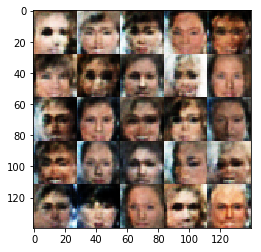

Epoch 1/1... Discriminator Loss: 1.0216... Generator Loss: 0.8034
Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 0.8809
Epoch 1/1... Discriminator Loss: 1.0512... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 0.8210... Generator Loss: 1.2127
Epoch 1/1... Discriminator Loss: 0.8708... Generator Loss: 0.9884
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.5357
Epoch 1/1... Discriminator Loss: 1.0037... Generator Loss: 0.9617
Epoch 1/1... Discriminator Loss: 0.9737... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 1.4514... Generator Loss: 0.4957
Epoch 1/1... Discriminator Loss: 0.9007... Generator Loss: 1.1642


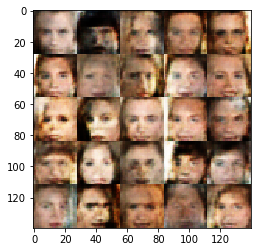

Epoch 1/1... Discriminator Loss: 1.0846... Generator Loss: 0.8011
Epoch 1/1... Discriminator Loss: 1.0089... Generator Loss: 0.8190
Epoch 1/1... Discriminator Loss: 1.0092... Generator Loss: 1.9462
Epoch 1/1... Discriminator Loss: 0.9354... Generator Loss: 1.0794
Epoch 1/1... Discriminator Loss: 1.0830... Generator Loss: 1.0684
Epoch 1/1... Discriminator Loss: 0.7685... Generator Loss: 1.3712
Epoch 1/1... Discriminator Loss: 1.0638... Generator Loss: 0.9014
Epoch 1/1... Discriminator Loss: 1.0630... Generator Loss: 1.0604
Epoch 1/1... Discriminator Loss: 1.0015... Generator Loss: 1.2105
Epoch 1/1... Discriminator Loss: 0.7701... Generator Loss: 1.8146


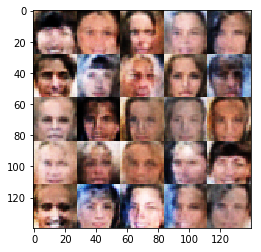

Epoch 1/1... Discriminator Loss: 0.9049... Generator Loss: 0.9094
Epoch 1/1... Discriminator Loss: 0.9458... Generator Loss: 0.8988
Epoch 1/1... Discriminator Loss: 0.7565... Generator Loss: 1.3406
Epoch 1/1... Discriminator Loss: 0.8618... Generator Loss: 0.9462
Epoch 1/1... Discriminator Loss: 0.7757... Generator Loss: 1.2357
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 0.9917
Epoch 1/1... Discriminator Loss: 1.1573... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 0.9336... Generator Loss: 1.4657
Epoch 1/1... Discriminator Loss: 0.8929... Generator Loss: 0.9472
Epoch 1/1... Discriminator Loss: 0.9206... Generator Loss: 0.9614


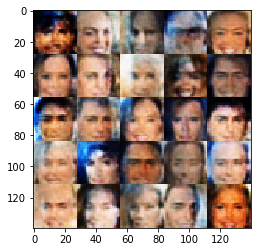

Epoch 1/1... Discriminator Loss: 0.7158... Generator Loss: 1.1059
Epoch 1/1... Discriminator Loss: 0.9569... Generator Loss: 1.0261
Epoch 1/1... Discriminator Loss: 0.9773... Generator Loss: 1.6003
Epoch 1/1... Discriminator Loss: 1.0719... Generator Loss: 0.9762
Epoch 1/1... Discriminator Loss: 0.7620... Generator Loss: 1.4869
Epoch 1/1... Discriminator Loss: 1.1238... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 0.7482... Generator Loss: 1.2227
Epoch 1/1... Discriminator Loss: 0.9078... Generator Loss: 0.9010
Epoch 1/1... Discriminator Loss: 1.0733... Generator Loss: 0.7186
Epoch 1/1... Discriminator Loss: 0.9255... Generator Loss: 1.6531


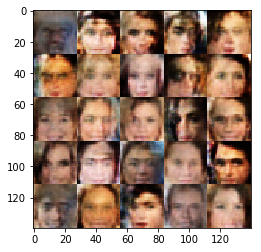

Epoch 1/1... Discriminator Loss: 0.9198... Generator Loss: 1.5345
Epoch 1/1... Discriminator Loss: 1.1830... Generator Loss: 0.5435
Epoch 1/1... Discriminator Loss: 0.8595... Generator Loss: 1.1656
Epoch 1/1... Discriminator Loss: 0.9088... Generator Loss: 0.7350
Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 0.8602
Epoch 1/1... Discriminator Loss: 0.9832... Generator Loss: 1.5443
Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 1.7957
Epoch 1/1... Discriminator Loss: 1.0136... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 0.9786... Generator Loss: 0.8959
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 0.7216


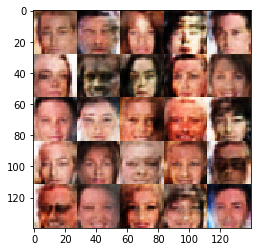

Epoch 1/1... Discriminator Loss: 0.6947... Generator Loss: 1.2534
Epoch 1/1... Discriminator Loss: 1.1450... Generator Loss: 1.0059
Epoch 1/1... Discriminator Loss: 0.6127... Generator Loss: 1.3738
Epoch 1/1... Discriminator Loss: 0.6920... Generator Loss: 1.5150
Epoch 1/1... Discriminator Loss: 0.9153... Generator Loss: 0.9329
Epoch 1/1... Discriminator Loss: 1.0429... Generator Loss: 1.6140
Epoch 1/1... Discriminator Loss: 0.8833... Generator Loss: 1.0645
Epoch 1/1... Discriminator Loss: 1.0269... Generator Loss: 0.6608
Epoch 1/1... Discriminator Loss: 0.9122... Generator Loss: 1.1040
Epoch 1/1... Discriminator Loss: 0.9141... Generator Loss: 0.7820


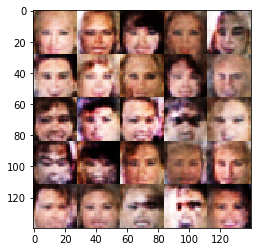

Epoch 1/1... Discriminator Loss: 0.9510... Generator Loss: 1.4227
Epoch 1/1... Discriminator Loss: 1.0182... Generator Loss: 1.0039
Epoch 1/1... Discriminator Loss: 0.8668... Generator Loss: 0.9166
Epoch 1/1... Discriminator Loss: 0.8653... Generator Loss: 1.0541
Epoch 1/1... Discriminator Loss: 0.9291... Generator Loss: 0.8162
Epoch 1/1... Discriminator Loss: 0.8123... Generator Loss: 1.4587
Epoch 1/1... Discriminator Loss: 0.8408... Generator Loss: 1.3173
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 0.8447... Generator Loss: 1.0282
Epoch 1/1... Discriminator Loss: 1.2037... Generator Loss: 0.5865


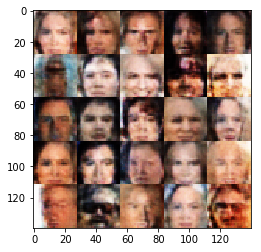

Epoch 1/1... Discriminator Loss: 1.0104... Generator Loss: 0.9339
Epoch 1/1... Discriminator Loss: 1.1081... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 0.7020... Generator Loss: 1.3209
Epoch 1/1... Discriminator Loss: 1.0170... Generator Loss: 1.6374
Epoch 1/1... Discriminator Loss: 0.7107... Generator Loss: 1.3586
Epoch 1/1... Discriminator Loss: 0.7305... Generator Loss: 1.3465
Epoch 1/1... Discriminator Loss: 0.9083... Generator Loss: 0.8040
Epoch 1/1... Discriminator Loss: 0.7452... Generator Loss: 1.5601
Epoch 1/1... Discriminator Loss: 1.2250... Generator Loss: 2.0444
Epoch 1/1... Discriminator Loss: 0.7569... Generator Loss: 1.4852


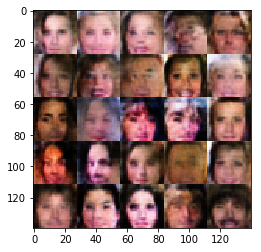

Epoch 1/1... Discriminator Loss: 0.9149... Generator Loss: 1.1074
Epoch 1/1... Discriminator Loss: 0.8940... Generator Loss: 1.8044
Epoch 1/1... Discriminator Loss: 1.0834... Generator Loss: 0.6830
Epoch 1/1... Discriminator Loss: 0.9784... Generator Loss: 1.2249
Epoch 1/1... Discriminator Loss: 0.7759... Generator Loss: 1.1141
Epoch 1/1... Discriminator Loss: 0.5996... Generator Loss: 1.5613
Epoch 1/1... Discriminator Loss: 0.7594... Generator Loss: 1.2862
Epoch 1/1... Discriminator Loss: 1.2229... Generator Loss: 0.5376
Epoch 1/1... Discriminator Loss: 0.8562... Generator Loss: 1.1152
Epoch 1/1... Discriminator Loss: 0.9867... Generator Loss: 0.9072


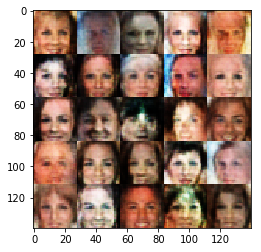

Epoch 1/1... Discriminator Loss: 0.9090... Generator Loss: 1.2462
Epoch 1/1... Discriminator Loss: 1.0018... Generator Loss: 0.7309
Epoch 1/1... Discriminator Loss: 0.9983... Generator Loss: 1.3872
Epoch 1/1... Discriminator Loss: 0.8060... Generator Loss: 1.2170
Epoch 1/1... Discriminator Loss: 0.8139... Generator Loss: 1.3108
Epoch 1/1... Discriminator Loss: 0.9736... Generator Loss: 0.9027
Epoch 1/1... Discriminator Loss: 0.7520... Generator Loss: 1.1819
Epoch 1/1... Discriminator Loss: 0.7422... Generator Loss: 1.5837
Epoch 1/1... Discriminator Loss: 0.9453... Generator Loss: 1.1579
Epoch 1/1... Discriminator Loss: 1.0573... Generator Loss: 0.8577


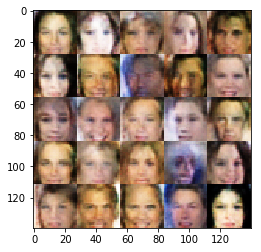

Epoch 1/1... Discriminator Loss: 0.8856... Generator Loss: 0.9910
Epoch 1/1... Discriminator Loss: 0.8644... Generator Loss: 0.8427
Epoch 1/1... Discriminator Loss: 0.7344... Generator Loss: 1.3630
Epoch 1/1... Discriminator Loss: 0.9482... Generator Loss: 1.9727
Epoch 1/1... Discriminator Loss: 1.0606... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 0.9839... Generator Loss: 0.7169


In [34]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.